# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install ./python

# !pip install -U pip


tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [4]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch
from unityagents import UnityEnvironment

%matplotlib inline
# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [9]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [10]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.30408478e+00 -1.00000000e+00
 -4.92529202e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.33014059e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

NameError: name 'num_agents' is not defined

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

Episode 1	Average Score: 1.10	Score: 1.10
Episode 2	Average Score: 0.81	Score: 0.53
Episode 3	Average Score: 0.81	Score: 0.79
Episode 4	Average Score: 0.82	Score: 0.85
Episode 5	Average Score: 0.94	Score: 1.41
Episode 6	Average Score: 0.89	Score: 0.69
Episode 7	Average Score: 0.77	Score: 0.00
Episode 8	Average Score: 0.99	Score: 2.58
Episode 9	Average Score: 1.03	Score: 1.29
Episode 10	Average Score: 0.97	Score: 0.46
Episode 11	Average Score: 0.98	Score: 1.04
Episode 12	Average Score: 0.98	Score: 0.97
Episode 13	Average Score: 1.02	Score: 1.56
Episode 14	Average Score: 1.13	Score: 2.60
Episode 15	Average Score: 1.09	Score: 0.48
Episode 16	Average Score: 1.14	Score: 1.91
Episode 17	Average Score: 1.17	Score: 1.58
Episode 18	Average Score: 1.12	Score: 0.37
Episode 19	Average Score: 1.12	Score: 1.08
Episode 20	Average Score: 1.28	Score: 4.38
Episode 21	Average Score: 1.31	Score: 1.77
Episode 22	Average Score: 1.31	Score: 1.33
Episode 23	Average Score: 1.37	Score: 2.71
Episode 24	Average S

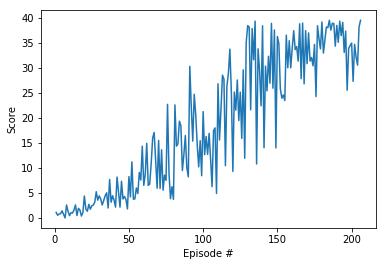

In [5]:
import random
import copy
from collections import deque, namedtuple

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from unityagents import UnityEnvironment

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return -lim, lim


class Actor(nn.Module):
    def __init__(self, state_size, action_size, fc1_units, fc2_units):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.bn2 = nn.BatchNorm1d(fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        if state.dim() == 1:
            state = torch.unsqueeze(state, 0)

        x = self.bn1(F.relu(self.fc1(state)))
        x = self.bn2(F.relu(self.fc2(x)))
        return F.tanh(self.fc3(x))


class Critic(nn.Module):
    def __init__(self, state_size, action_size, fc1_units, fc2_units):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units + action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        if state.dim() == 1:
            state = torch.unsqueeze(state, 0)

        x = self.bn1(F.relu(self.fc1(state)))
        x = F.relu(self.fc2(torch.cat((x, action), dim=1)))
        return self.fc3(x)


Experience = namedtuple('Experience', 'state action reward next_state done')


class Replay:
    def __init__(self, action_size, buffer_size, batch_size):
        self.action_size = action_size
        self.buffer = deque(maxlen=buffer_size)
        self.batch_size = batch_size

    def add(self, state, action, reward, next_state, done):
        experience = Experience(state, action, reward, next_state, done)
        self.buffer.append(experience)

    def sample(self):
        experiences = random.sample(self.buffer, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences])).float().to(DEVICE)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences])).float().to(DEVICE)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences])).float().to(DEVICE)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences])).float().to(DEVICE)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences]).astype(np.uint8)).float().to(DEVICE)

        return states, actions, rewards, next_states, dones

    def __len__(self):
        return len(self.buffer)


class Agent:
    def __init__(self, config):
        self.config = config

        self.online_actor = config.actor_fn().to(DEVICE)
        self.target_actor = config.actor_fn().to(DEVICE)
        self.actor_opt = config.actor_opt_fn(self.online_actor.parameters())

        self.online_critic = config.critic_fn().to(DEVICE)
        self.target_critic = config.critic_fn().to(DEVICE)
        self.critic_opt = config.critic_opt_fn(self.online_critic.parameters())

        self.noise = config.noise_fn()
        self.replay = config.replay_fn()

    def step(self, state, action, reward, next_state, done):
        self.replay.add(state, action, reward, next_state, done)

        if len(self.replay) > self.replay.batch_size:
            self.learn()

    def act(self, state, add_noise=True):
        state = torch.from_numpy(state).float().to(DEVICE)

        self.online_actor.eval()

        with torch.no_grad():
            action = self.online_actor(state).cpu().data.numpy()

        self.online_actor.train()

        if add_noise:
            action += self.noise.sample()

        return np.clip(action, -1, 1)

    def reset(self):
        self.noise.reset()

    def learn(self):
        states, actions, rewards, next_states, dones = self.replay.sample()

        # Update online critic model
        # Predict actions for the next states with the target actor model
        target_next_actions = self.target_actor(next_states)
        # Compute Q values for the next states and actions with the target critic model
        target_next_qs = self.target_critic(next_states, target_next_actions)
        # Compute target Q values for the current states using the Bellman equation
        target_qs = rewards + (self.config.discount * target_next_qs * (1 - dones))
        # Compute Q values for the current states and actions with the online critic model
        online_qs = self.online_critic(states, actions)
        # Compute and minimize the online critic loss
        critic_loss = F.mse_loss(online_qs, target_qs)
        self.critic_opt.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.online_critic.parameters(), 1)
        self.critic_opt.step()

        # Update online actor model
        # Predict actions for current states from the online actor model
        online_actions = self.online_actor(states)
        # Compute and minimize the online actor loss
        actor_loss = -self.online_critic(states, online_actions).mean()
        self.actor_opt.zero_grad()
        actor_loss.backward()
        self.actor_opt.step()

        # Update target critic and actor models
        self.soft_update(self.online_critic, self.target_critic)
        self.soft_update(self.online_actor, self.target_actor)

    def soft_update(self, online_model, target_model):
        for target_param, online_param in zip(target_model.parameters(), online_model.parameters()):
            target_param.data.copy_(self.config.target_mix * online_param.data + (1.0 - self.config.target_mix) * target_param.data)


class OrnsteinUhlenbeck:
    def __init__(self, size, mu, theta, sigma):
        self.state = None
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.reset()

    def reset(self):
        self.state = copy.copy(self.mu)

    def sample(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for _ in range(len(x))])
        self.state = x + dx
        return self.state


def run(agent):
    config = agent.config
    scores_deque = deque(maxlen=100)
    scores = []

    for episode in range(1, config.max_episodes + 1):
        agent.reset()
        score = 0

        env_info = config.env.reset(train_mode=True)[config.brain_name]
        state = env_info.vector_observations[0]

        for step in range(config.max_steps):
            action = agent.act(state)
            env_info = config.env.step(action)[config.brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]

            agent.step(state, action, reward, next_state, done)

            score += reward
            state = next_state

            if done:
                break

        scores.append(score)
        scores_deque.append(score)
        mean_score = np.mean(scores_deque)

        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(episode, mean_score, score))

        if mean_score >= config.goal_score:
            break

    torch.save(agent.online_actor.state_dict(), config.actor_path)
    torch.save(agent.online_critic.state_dict(), config.critic_path)

    fig, ax = plt.subplots()
    ax.plot(np.arange(1, len(scores) + 1), scores)
    ax.set_ylabel('Score')
    ax.set_xlabel('Episode #')
    fig.savefig(config.scores_path)
    plt.show()


class Config:
    def __init__(self, seed):
        self.seed = seed
        random.seed(seed)
        torch.manual_seed(seed)

        self.env = None
        self.brain_name = None
        self.state_size = None
        self.action_size = None
        self.actor_fn = None
        self.actor_opt_fn = None
        self.critic_fn = None
        self.critic_opt_fn = None
        self.replay_fn = None
        self.noise_fn = None
        self.discount = None
        self.target_mix = None

        self.max_episodes = None
        self.max_steps = None

        self.actor_path = None
        self.critic_path = None
        self.scores_path = None


def main():
    config = Config(seed=6)
    config.env =UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
    config.brain_name = config.env.brain_names[0]
    config.state_size = config.env.brains[config.brain_name].vector_observation_space_size
    config.action_size = config.env.brains[config.brain_name].vector_action_space_size

    config.actor_fn = lambda: Actor(config.state_size, config.action_size, fc1_units=256, fc2_units=256)
    config.actor_opt_fn = lambda params: optim.Adam(params, lr=3e-4)

    config.critic_fn = lambda: Critic(config.state_size, config.action_size, fc1_units=256, fc2_units=256)
    config.critic_opt_fn = lambda params: optim.Adam(params, lr=3e-4)

    config.replay_fn = lambda: Replay(config.action_size, buffer_size=int(1e6), batch_size=128)
    config.noise_fn = lambda: OrnsteinUhlenbeck(config.action_size, mu=0., theta=0.15, sigma=0.05)

    config.discount = 0.99
    config.target_mix = 1e-3

    config.max_episodes = int(1000)
    config.max_steps = int(1e6)
    config.goal_score = 30

    config.actor_path = 'actor.pth'
    config.critic_path = 'critic.pth'
    config.scores_path = 'scores.png'

    agent = Agent(config)
    run(agent)


if __name__ == '__main__':
    main()

In [7]:
import os
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

if __name__ == '__main__':
    zipf = zipfile.ZipFile('Python.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('tmp/', zipf)
    zipf.close()

'/home/workspace'

In [ ]:
import shutil
shutil.make_archive("ab", 'zip', os.getcwd())